## Importing and looking at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [23]:
#importing the data
no_tumor = next(os.walk('./data/Training/no_tumor'))[2]
p_tumor = next(os.walk('./data/Training/pituitary_tumor'))[2]
g_tumor = next(os.walk('./data/Training/glioma_tumor'))[2]
m_tumor = next(os.walk('./data/Training/meningioma_tumor'))[2]
X, y = [], []

for _ in no_tumor:
    X.append(cv2.imread(f'./data/Training/no_tumor/{_}'))
    y.append('No Tumor')
    
for _ in p_tumor:
    X.append(cv2.imread(f'./data/Training/pituitary_tumor/{_}'))
    y.append('Pituitary Tumor')
    
for _ in g_tumor:
    X.append(cv2.imread(f'./data/Training/glioma_tumor/{_}'))
    y.append('Glioma Tumor')
    
for _ in m_tumor:
    X.append(cv2.imread(f'./data/Training/meningioma_tumor/{_}'))
    y.append('Meningioma Tumor')

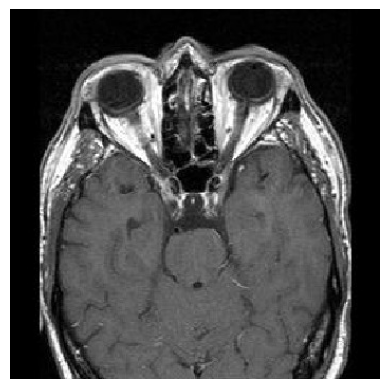

In [24]:
#plotting the results
plt.imshow(X[0], cmap='gray')
plt.axis('off')
plt.show()

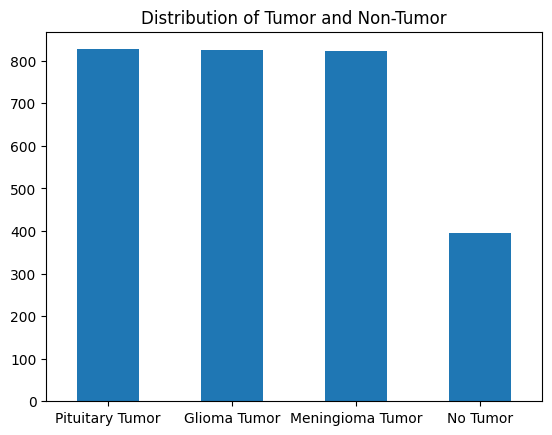

In [25]:
#looking at the class imbalance
y = np.asarray(y)
pd.Series(y).value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of Tumor and Non-Tumor')
plt.show()

## Data Preprocessing

In [26]:
#resizing the images
X_resize=[]
for _ in X:
    X_resize.append(cv2.resize(_, (256, 256), interpolation=cv2.INTER_CUBIC))
    
X_resize = np.asarray(X_resize)

In [27]:
X_resize.shape

(2870, 256, 256, 3)

In [28]:
#converting the image into grayscale
X_gray=[]
for _ in X_resize:
    X_gray.append(cv2.cvtColor(_, cv2.COLOR_BGR2GRAY))
    
X_gray = np.asarray(X_gray)

In [29]:
X_gray.shape

(2870, 256, 256)

## Applying GLCM

GLCM (Gray Level Co-occurring Matrix) is a matrix that is defined over an image to be the distribution of co-occurring values at a given offset. 

That is to say that GLCM calculates how often a pixel with gray-level value `i` occurs either horizontally, vertically, or diagonally to adjacent pixels with the value `i`.

In [30]:
from skimage.feature import graycomatrix, graycoprops

#calcuating the greycomatrix() and greycorprops for 0, 45, 90, and 135 degrees
def glcm(img, props):
    glcm = graycomatrix(img, distances = [5],
                        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4],
                        levels=256,
                        symmetric=True,
                        normed=True)
    feature = []
    glcm_props = [prop for name in props for prop in graycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    
    return feature

In [31]:
props = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(X_gray, y): 
    glcm_all_agls.append(glcm(img, props))
 
cols = []
angles = ['0', '45', '90','135']
for name in props:
    for ang in angles:
        cols.append(name + "_" + ang)

In [32]:
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = cols)

glcm_df.head(15)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,27.766590,26.427170,20.101002,26.659281,0.650755,0.683240,0.801918,0.676638,0.200361,0.201762,...,1457.206020,2365.335459,0.010035,0.011271,0.016329,0.011271,0.100174,0.106164,0.127785,0.106163
1,21.449655,21.404242,19.224399,21.939201,0.685946,0.680656,0.719722,0.668582,0.156065,0.161747,...,1418.333588,1681.510377,0.002639,0.003166,0.006028,0.003182,0.051376,0.056266,0.077643,0.056408
2,16.243401,16.374606,13.354410,16.427359,0.714552,0.716328,0.790384,0.713273,0.377595,0.373613,...,885.930855,1209.781289,0.078329,0.075889,0.083751,0.076079,0.279874,0.275479,0.289398,0.275824
3,34.853290,36.043588,29.925221,36.371614,0.645949,0.626250,0.714054,0.621824,0.348666,0.343657,...,3601.546268,4771.769605,0.093235,0.090427,0.100459,0.089867,0.305344,0.300711,0.316952,0.299779
4,17.580817,17.163942,14.460673,17.604907,0.728821,0.749916,0.816059,0.736943,0.346505,0.338176,...,853.875420,1231.212018,0.026254,0.025532,0.027352,0.025583,0.162032,0.159788,0.165385,0.159947
5,26.108161,27.920037,23.423696,27.650227,0.550422,0.519518,0.621228,0.516099,0.450569,0.440724,...,2720.246810,3493.406935,0.151753,0.143757,0.152622,0.145139,0.389555,0.379153,0.390668,0.380971
6,13.751821,14.684603,13.540416,14.586514,0.832536,0.822451,0.845848,0.822427,0.188857,0.178999,...,562.725675,649.136842,0.003214,0.002991,0.003101,0.003010,0.056690,0.054689,0.055687,0.054866
7,31.633186,32.958648,26.977169,32.861269,0.749964,0.739567,0.799102,0.734955,0.368278,0.342489,...,2836.836825,3752.318752,0.081061,0.078753,0.087764,0.079217,0.284712,0.280630,0.296249,0.281455
8,28.342910,30.228663,26.627599,28.182933,0.552284,0.511841,0.600187,0.565453,0.288666,0.271229,...,2388.769438,2596.524266,0.052259,0.045085,0.049055,0.045442,0.228602,0.212332,0.221483,0.213170
9,22.722438,23.468128,22.026970,23.037210,0.748926,0.732835,0.760978,0.729496,0.077360,0.074282,...,1186.124860,1317.851427,0.000186,0.000176,0.000216,0.000183,0.013653,0.013275,0.014711,0.013514


## Splitting the Dataset and Training the Model

In [33]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(glcm_df.values, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [42]:
#training svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

#making predictions
y_pred = model.predict(X_test)

## Evaluating the model

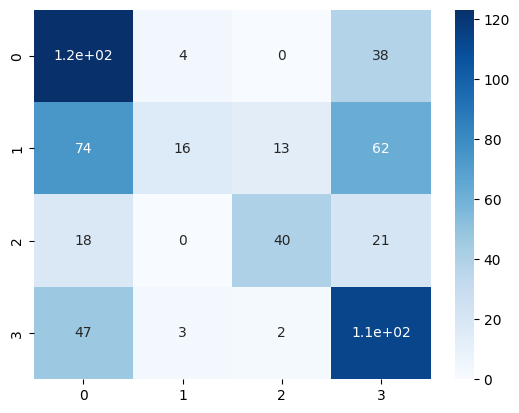

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap='Blues')
plt.show()

Clearly, the model does not perform very well.

In [36]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support



    Glioma Tumor       0.47      0.75      0.58       165

Meningioma Tumor       0.70      0.10      0.17       165

        No Tumor       0.73      0.51      0.60        79

 Pituitary Tumor       0.48      0.68      0.57       165



        accuracy                           0.51       574

       macro avg       0.59      0.51      0.48       574

    weighted avg       0.57      0.51      0.46       574




The model results in an accuracy of about 51%. Let us see if we can improve that.

## Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

grid = {'kernel':['sigmoid', 'rbf'],
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

gs = GridSearchCV(estimator=SVC(), 
                  param_grid=grid, 
                  cv=5,
                  refit=True,
                  verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid', 'rbf']},
             verbose=1)

In [38]:
gs.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

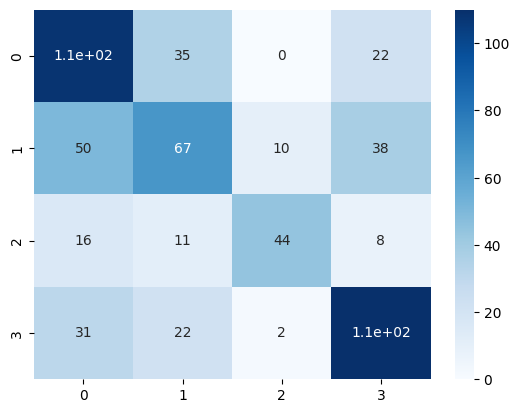

In [39]:
sns.heatmap(confusion_matrix(y_test, gs.predict(X_test)),
            annot=True,
            cmap='Blues')
plt.show()

In [40]:
print(classification_report(y_test, gs.predict(X_test)))

                  precision    recall  f1-score   support



    Glioma Tumor       0.53      0.65      0.58       165

Meningioma Tumor       0.50      0.41      0.45       165

        No Tumor       0.79      0.56      0.65        79

 Pituitary Tumor       0.62      0.67      0.64       165



        accuracy                           0.57       574

       macro avg       0.61      0.57      0.58       574

    weighted avg       0.58      0.57      0.57       574




The accuracy is now at 57% but there is a lot more consistency in the f1-scores of various classes whch shows that the model is performing moderately at predicting different classes.

## ROC curve

Since the classification in multi-class, ROC-AUC does not apply to this model.